In [ ]:
#import dataset from local
from google.colab import files
uploaded = files.upload()

Saving CO2 Emissions.csv to CO2 Emissions.csv


In [ ]:
# print number of files and their length
for filename in uploaded.keys():
    print(f"Uploaded: {filename} ({len(uploaded[filename])} bytes)")

Uploaded: CO2 Emissions.csv (476091 bytes)


In [ ]:
#Alternate way to read the uploaded csv file
# temp=list(uploaded.keys())[0]
# pd.read_csv(temp)

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
file_name = next(iter(uploaded)) #used to read the uploaded file
df=pd.read_csv(file_name)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(7385, 12)

In [ ]:
#display(df.columns)
num_col=df.select_dtypes(include=['int64','float64']).columns
print("numericals:",num_col)
cat_col=df.select_dtypes(include=['object']).columns
print('categorical :',cat_col)

numericals: Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')
categorical : Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


In [ ]:
for  item in cat_col:
  print(f'{item} : {df[item].unique()}  ---  count:{df[item].nunique()}')
  print( '  ')

Make : ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']  ---  count:42
  
Model : ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']  ---  count:2053
  
Vehicle Class : ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']  ---  count:16
  
Transmission : ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


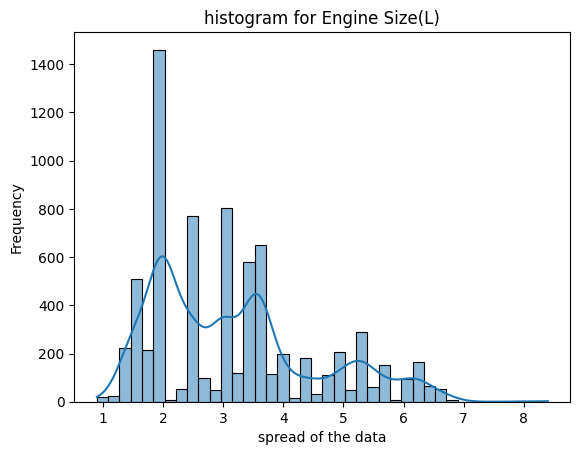

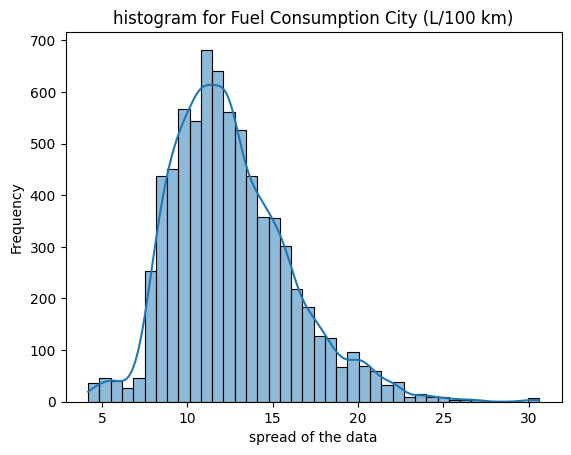

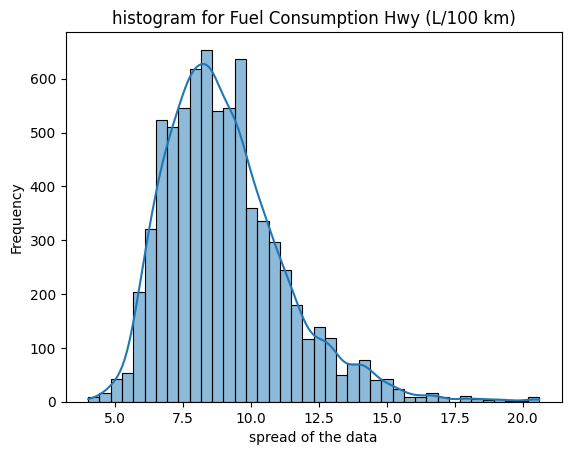

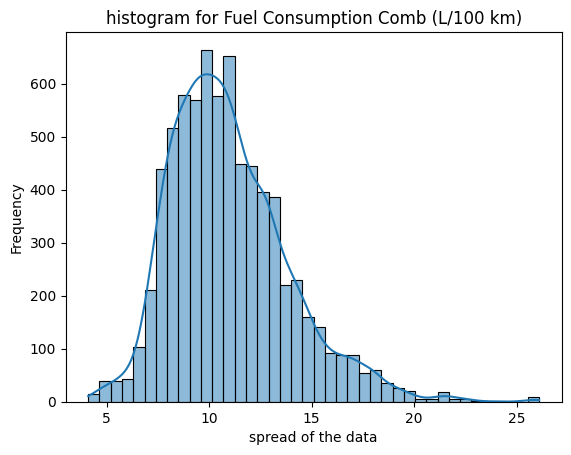

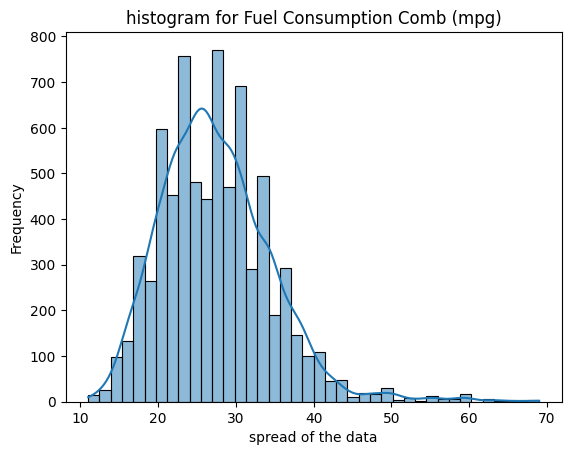

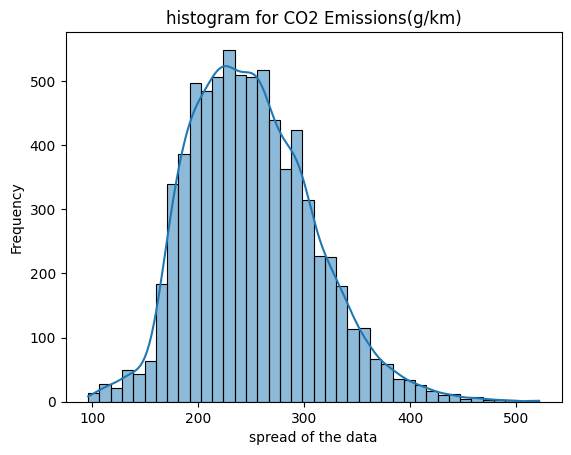

under 30 uniques:['Cylinders']


In [ ]:
under=[]
for col in df.select_dtypes(include=['int','float']).columns:
  if df[col].nunique()>30:
    sns.histplot(x=df[col],bins=40,kde=True)
    plt.title(f'histogram for {col}')
    plt.xlabel("spread of the data")
    plt.ylabel("Frequency")
    plt.show()
  else:
    under.append(col)

print(f'under 30 uniques:{under}')


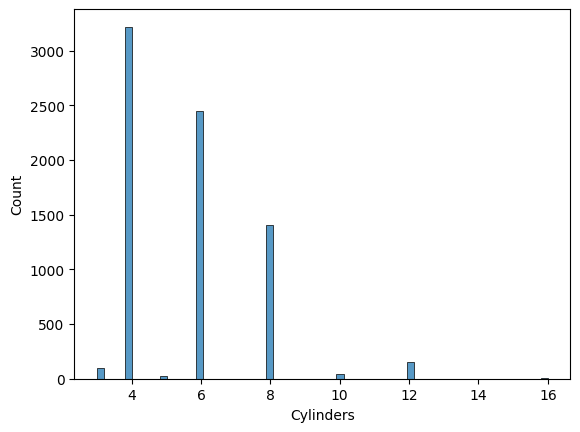

In [ ]:
sns.histplot(x=df['Cylinders'])
plt.show()

In [ ]:
#renaming columns
df
df1=df.rename(columns={'Engine Size(L)':'Engine Size in L','Fuel Consumption City (L/100 km)':'Fuel City L/100',
'Fuel Consumption Hwy (L/100 km)':'Fuel Hwy L/100','Fuel Consumption Comb (L/100 km)':'Fuel Comb L/100',
'Fuel Consumption Comb (mpg)':'Fuel Comb mpg','CO2 Emissions(g/km)':'Co2'},inplace=False)

In [ ]:
df1.head()

,Make,Model,Vehicle Class,Engine Size in L,Cylinders,Transmission,Fuel Type,Fuel City L/100,Fuel Hwy L/100,Fuel Comb L/100,Fuel Comb mpg,Co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df1.corr()

<ipython-input-15-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Engine Size in L,Cylinders,Fuel City L/100,Fuel Hwy L/100,Fuel Comb L/100,Fuel Comb mpg,Co2
Engine Size in L,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel City L/100,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Hwy L/100,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Comb L/100,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Comb mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
Co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [ ]:
X=df1.select_dtypes(include=['int','float']).iloc[:,0:6]
Y=df1.iloc[:,11]

In [ ]:
 #model implementation
 #train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
 #standardization of dataset

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
#import linear regresson
from sklearn.linear_model import LinearRegression

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
mse=cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-329.28710470217044

In [ ]:
##prediction
reg_predict=reg.predict(x_test)

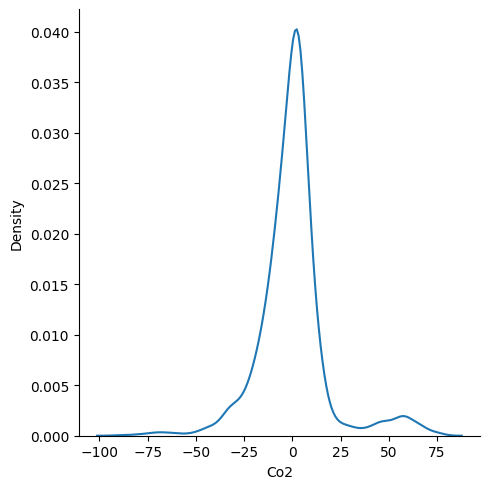

In [ ]:
sns.displot(reg_predict-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_predict,y_test)
score

0.8918429358310122